In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r"C:\Users\soora\Downloads\mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [ ]:
df.shape


(1453, 15)

In [ ]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
l = ['convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
le= LabelEncoder()
for i in l:
    df[i]=le.fit_transform(df[i].astype(str))

In [ ]:
x=df.iloc[:,1:11]
x

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,1,0,1,0,1,1,0,1,0,0
1,1,0,1,1,1,1,1,1,0,0
2,1,1,1,1,1,0,1,1,1,0
3,1,0,1,1,1,1,1,0,0,1
4,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,1,0,1
1449,1,0,1,0,0,1,1,0,1,0
1450,1,0,1,0,1,0,1,1,0,0
1451,1,0,0,0,1,1,1,0,1,0


In [ ]:
df1 = df.loc[:,l].values
df1

array([[1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1]])

C:\Users\soora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


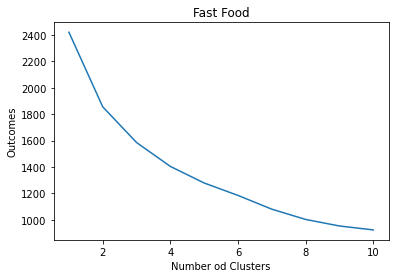

In [ ]:
k = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df1)
    k.append(kmeans.inertia_)
    
plt.plot(range(1,11),k)
plt.title('Fast Food')
plt.xlabel('Number od Clusters')
plt.ylabel('Outcomes')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0).fit(df1)
y_kmeans=kmeans.fit_predict(x)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_)
print (kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_)

[1 0 2 ... 2 1 2]
1585.2743871801736
5
[[ 9.29752066e-01  1.09504132e-01  9.75206612e-01  1.00000000e+00
   9.50413223e-01  8.92561983e-01  6.17768595e-01  9.91735537e-02
   1.42561983e-01  3.18181818e-01]
 [ 9.67479675e-01  8.13008130e-02  7.31707317e-01 -1.11022302e-16
   9.69512195e-01  8.84146341e-01  7.72357724e-01  2.84552846e-02
   3.19105691e-01  6.50406504e-02]
 [ 8.23899371e-01  9.01467505e-02  8.97274633e-01  5.89098532e-01
   7.77777778e-01  6.28930818e-03  5.38784067e-01  9.60167715e-01
   1.32075472e-01  3.50104822e-01]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df1)

pca = PCA(n_components=10)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',]
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.116313,0.095614,0.554242,-0.415637,-0.175013,-0.491794,-0.045028,0.159400,0.542400,-0.558750
1,0.107873,0.014797,-0.723665,-0.058500,0.006133,-0.095647,-0.066112,-0.035506,0.518249,-0.495180
2,0.409249,0.752189,-0.713590,0.821180,-0.251663,-0.513264,0.473525,0.365140,-0.028274,0.279553
3,-0.050924,-0.764728,-0.399897,0.179238,0.619904,0.077978,-0.120752,-0.228771,-0.238126,-0.063348
4,-0.252505,-0.584748,0.094242,0.577219,-0.811702,-0.345015,-0.330408,0.175805,0.017240,0.088782
...,...,...,...,...,...,...,...,...,...,...
1448,1.464244,-0.136750,0.208380,0.170204,0.020156,0.294250,-0.144237,0.350195,-0.434691,-0.462054
1449,-0.827432,0.297399,0.217433,0.427201,0.013580,0.350417,-0.458237,0.890571,-0.270197,-0.192336
1450,0.267577,0.971246,-0.078142,-0.463830,0.206186,-0.170038,-0.066526,-0.036498,0.066957,-0.016133
1451,-1.093546,0.430797,0.390835,0.687908,-0.095694,0.166696,-0.042993,-0.339051,0.005785,-0.108120


In [ ]:
print(df['yummy'].value_counts())
print(df['convenient'].value_counts())
print(df['VisitFrequency'].value_counts())

Yes    803
No     650
Name: yummy, dtype: int64
1    1319
0     134
Name: convenient, dtype: int64
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
df['VisitFrequency'] = en.fit_transform(df[['VisitFrequency']]).toarray()

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,1,0,1,0,1,1,0,1,0,0,-3,61,1.0,Female
1,Yes,1,0,1,1,1,1,1,1,0,0,+2,51,1.0,Female
2,No,1,1,1,1,1,0,1,1,1,0,+1,62,1.0,Female
3,Yes,1,0,1,1,1,1,1,0,0,1,+4,69,0.0,Female
4,No,1,0,1,1,1,1,0,0,1,0,+2,49,0.0,Male


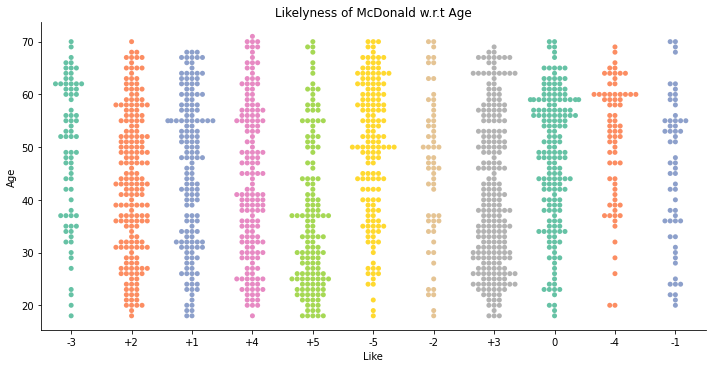

In [ ]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

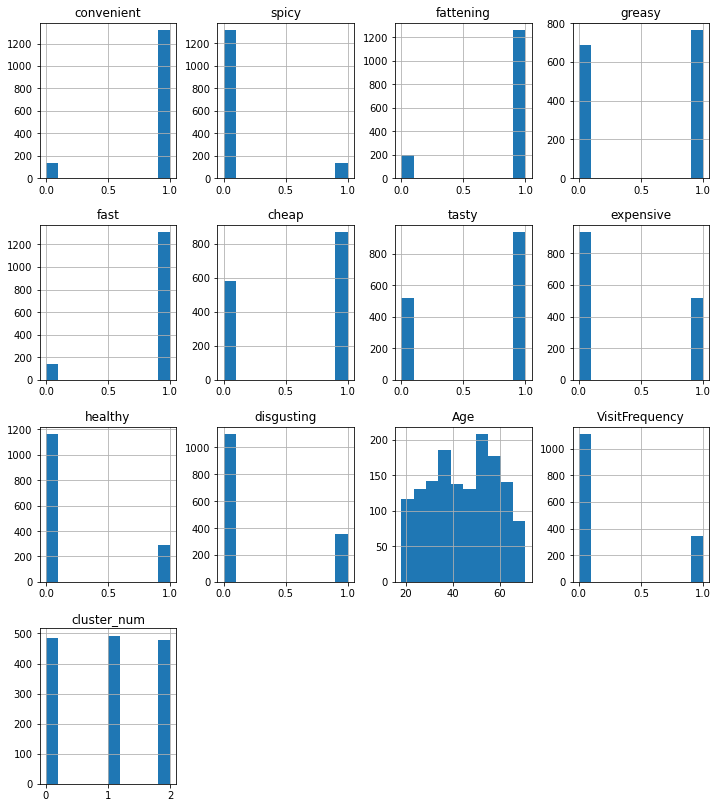

In [ ]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

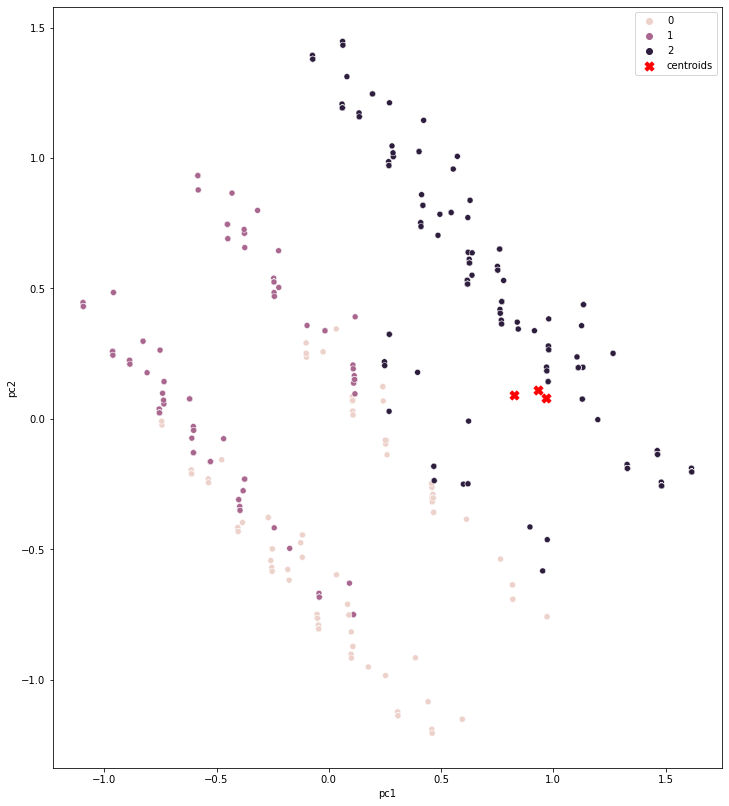

In [ ]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()